In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",100)


In [2]:
path="C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/data/raw/healthcare-dataset-stroke-data.csv"
df_raw=pd.read_csv(path)
df_raw.shape
df_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df_raw.info()

<class 'pandas.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   str    
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   str    
 6   work_type          5110 non-null   str    
 7   Residence_type     5110 non-null   str    
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   str    
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), str(5)
memory usage: 479.2 KB


In [4]:
df_raw.info()
df_raw.isna().sum().sort_values(ascending=False)
df_raw.describe(include="all")

<class 'pandas.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   str    
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   str    
 6   work_type          5110 non-null   str    
 7   Residence_type     5110 non-null   str    
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   str    
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), str(5)
memory usage: 479.2 KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


Clean the dataset 

Standardize column names

Fix data types

Handle missing values 
Remove duplicates

Basic validity checks

Save cleaned dataset to data/processed/

In [5]:
df=df_raw.copy()
df.columns=df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns



Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='str')

In [6]:
miss=df.isna().sum().sort_values(ascending=False)
duplic=df.duplicated().sum
duplic,miss.head(10)

(<bound method Series.sum of 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 5105    False
 5106    False
 5107    False
 5108    False
 5109    False
 Length: 5110, dtype: bool>,
 bmi                  201
 id                     0
 age                    0
 gender                 0
 hypertension           0
 heart_disease          0
 work_type              0
 ever_married           0
 residence_type         0
 avg_glucose_level      0
 dtype: int64)

In [7]:
#use median for missing bmi 
if "bmi" in df.columns:
    df["bmi"]=df["bmi"].fillna(df["bmi"].median())

In [8]:
#Remove duplicate if exists
df=df.drop_duplicates()
df.shape

(5110, 12)

In [9]:
#validity check
#Age should be above 0
df=df[df["age"]>0]
#bmi should be positive
df=df[df["bmi"]>0]
#glucose should be positive
df=df[df["avg_glucose_level"]>0]

df.head

<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban   

In [10]:

clean_path = "C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/data/processed/stroke_cleaned.csv"
df.to_csv(clean_path, index=False)

clean_path


'C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/data/processed/stroke_cleaned.csv'

In [11]:
#Make output folder
import os
os.makedirs("C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/outputs/figures",exist_ok=True)

In [12]:
# Create age groups for better analysis
df['age_group'] = pd.cut(df['age'], 
                          bins=[0, 18, 35, 50, 65, 80, 100], 
                          labels=['0-18', '19-35', '36-50', '51-65', '66-80', '80+'])

# Create BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

print("Age Groups Distribution:")
print(df['age_group'].value_counts().sort_index())
print("\nBMI Categories Distribution:")
print(df['bmi_category'].value_counts())

Age Groups Distribution:
age_group
0-18      916
19-35     983
36-50    1084
51-65    1162
66-80     849
80+       116
Name: count, dtype: int64

BMI Categories Distribution:
bmi_category
Obese          1920
Overweight     1610
Normal         1243
Underweight     337
Name: count, dtype: int64


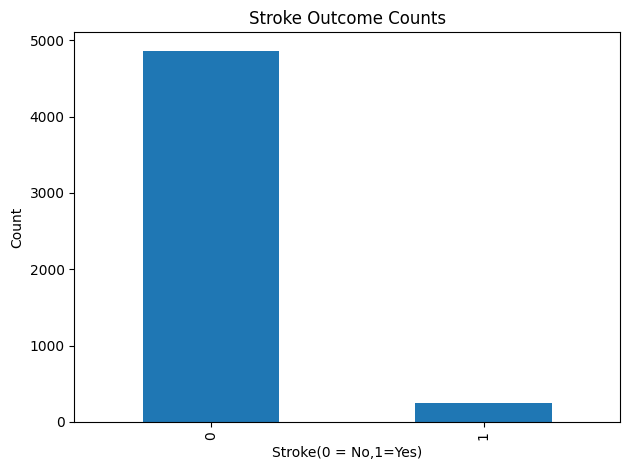

In [13]:

#vis 1 Stroke count
plt.figure()
df["stroke"].value_counts().plot(kind="bar")
plt.title("Stroke Outcome Counts")
plt.xlabel("Stroke(0 = No,1=Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/outputs/figures/01_stroke_counts.png",dpi=200)
plt.show()
#This will show you the class imbalance in your dataset (typically around 5% stroke cases, 95% non-stroke

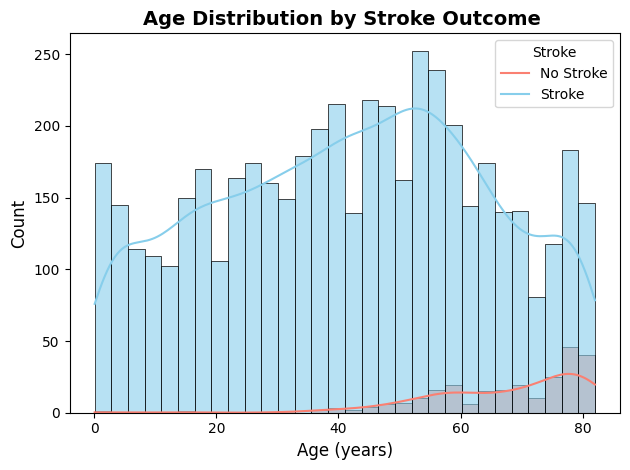

In [14]:

#Vis 2-Age distribution by age outcome
plt.figure()
sns.histplot(data=df,x="age",hue="stroke",bins=30,kde=True,
             palette={0: "skyblue", 1: "salmon"},
             alpha=0.6, edgecolor='black', linewidth=0.5)
plt.title("Age Distribution by Stroke Outcome ", fontsize=14, fontweight='bold')
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Count", fontsize=12)
# Add legend with custom labels
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.tight_layout()
plt.savefig("C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/outputs/figures/02_stroke_by_age.png",dpi=200)
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_24116\522167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="stroke",y="avg_glucose_level", palette={'0': "skyblue", '1': "salmon"},


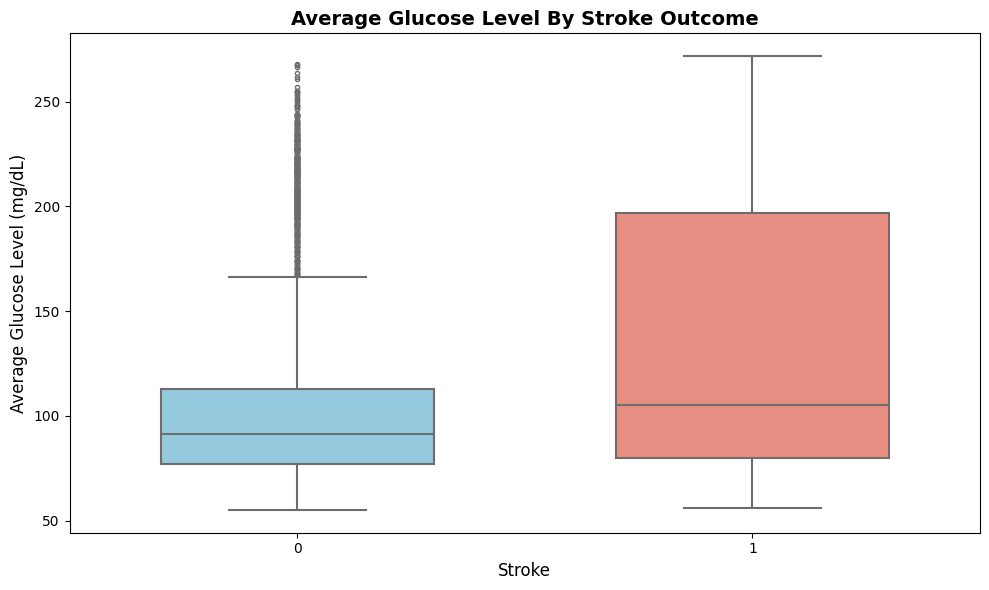

In [16]:
#Vis 3 Avg glucose level by stroke outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x="stroke",y="avg_glucose_level", palette={'0': "skyblue", '1': "salmon"},
            width=0.6, linewidth=1.5, fliersize=3)
plt.title("Average Glucose Level By Stroke Outcome", fontsize=14, fontweight='bold')
plt.xlabel("Stroke", fontsize=12)
plt.ylabel("Average Glucose Level (mg/dL)", fontsize=12)
plt.tight_layout()
plt.savefig("C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/outputs/figures/03_glucose_by_stroke.png",dpi=200)
plt.show()

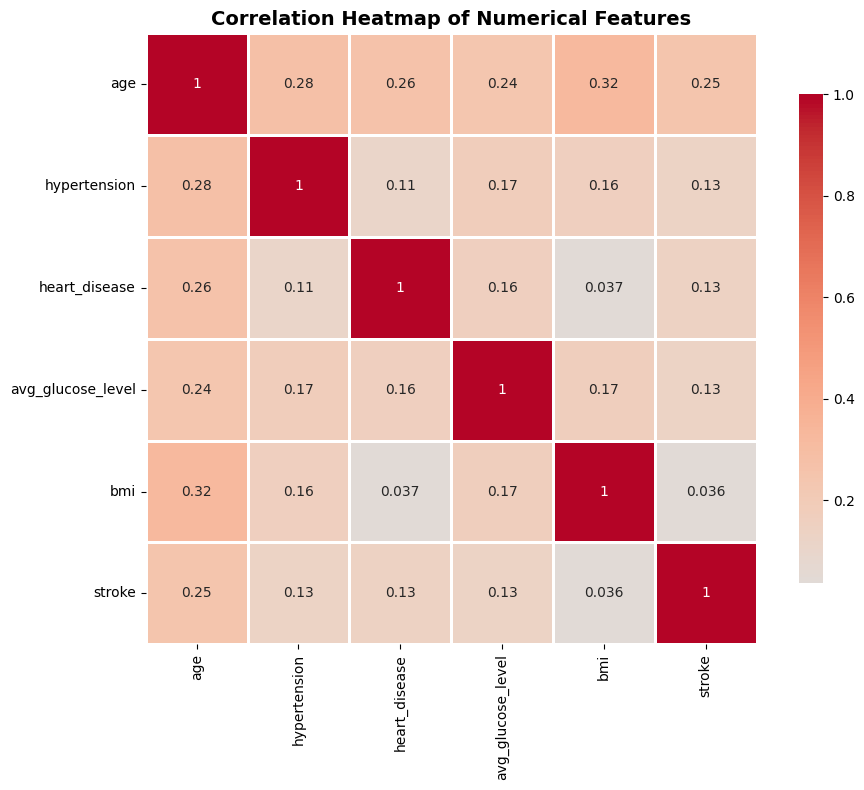

In [ ]:
#Vis4 Correlation Heatmap
plt.figure(figsize=(10, 8))

# Select numerical columns for correlation
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/outputs/figures/04_correlation_heat_map.png",dpi=200)
plt.show()
plt.show()

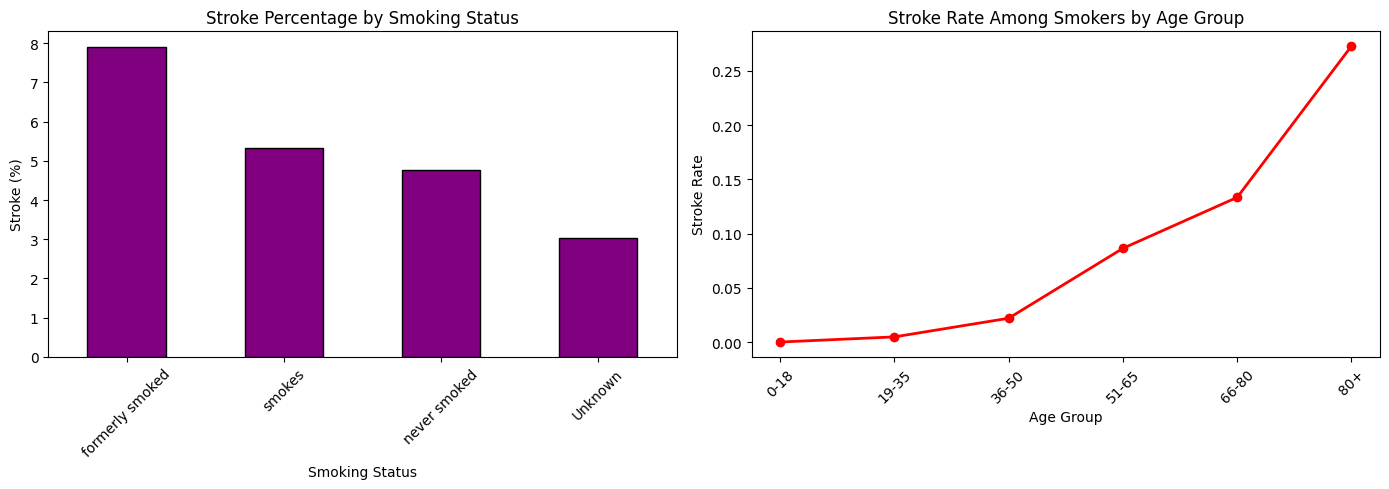

In [ ]:
# Visualization 5: Smoking Status Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Smoking status and stroke
smoking_stroke = df.groupby('smoking_status')['stroke'].mean() * 100
smoking_stroke = smoking_stroke.sort_values(ascending=False)
smoking_stroke.plot(kind='bar', ax=axes[0], color='purple', edgecolor='black')
axes[0].set_title('Stroke Percentage by Smoking Status')
axes[0].set_xlabel('Smoking Status')
axes[0].set_ylabel('Stroke (%)')
axes[0].tick_params(axis='x', rotation=45)

# Combined risk factors for smokers
smoker_df = df[df['smoking_status'] == 'smokes']
age_glucose = smoker_df.groupby('age_group')[['avg_glucose_level', 'stroke']].mean()
age_glucose['stroke'].plot(kind='line', marker='o', ax=axes[1], color='red', linewidth=2)
axes[1].set_title('Stroke Rate Among Smokers by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Stroke Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/outputs/figures/05_stroke_by_smoking_status.png",dpi=200)
plt.show()

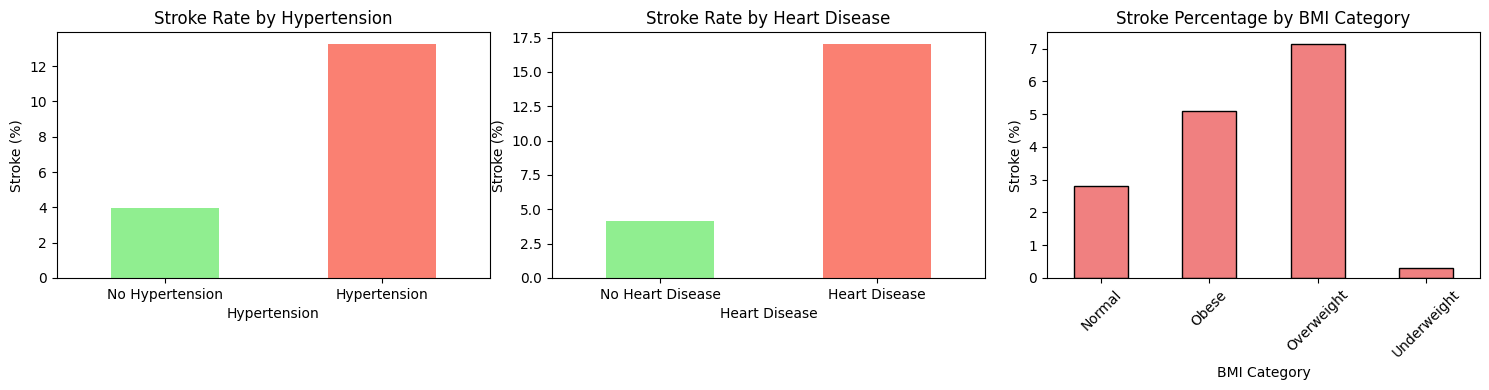

In [ ]:
# Vis 6 Health Factors Correlation
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Hypertension and stroke
hypertension_stroke = pd.crosstab(df['hypertension'], df['stroke'], normalize='index') * 100
hypertension_stroke[1].plot(kind='bar', ax=axes[0], color=['lightgreen', 'salmon'])
axes[0].set_title('Stroke Rate by Hypertension')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Stroke (%)')
axes[0].set_xticklabels(['No Hypertension', 'Hypertension'], rotation=0)

# Heart disease and stroke
heart_stroke = pd.crosstab(df['heart_disease'], df['stroke'], normalize='index') * 100
heart_stroke[1].plot(kind='bar', ax=axes[1], color=['lightgreen', 'salmon'])
axes[1].set_title('Stroke Rate by Heart Disease')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Stroke (%)')
axes[1].set_xticklabels(['No Heart Disease', 'Heart Disease'], rotation=0)

# BMI categories and stroke
bmi_stroke = df.groupby('bmi_category')['stroke'].mean() * 100
bmi_stroke.plot(kind='bar', ax=axes[2], color='lightcoral', edgecolor='black')
axes[2].set_title('Stroke Percentage by BMI Category')
axes[2].set_xlabel('BMI Category')
axes[2].set_ylabel('Stroke (%)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/outputs/figures/06_stroke_by_disease.png",dpi=200)
plt.show()

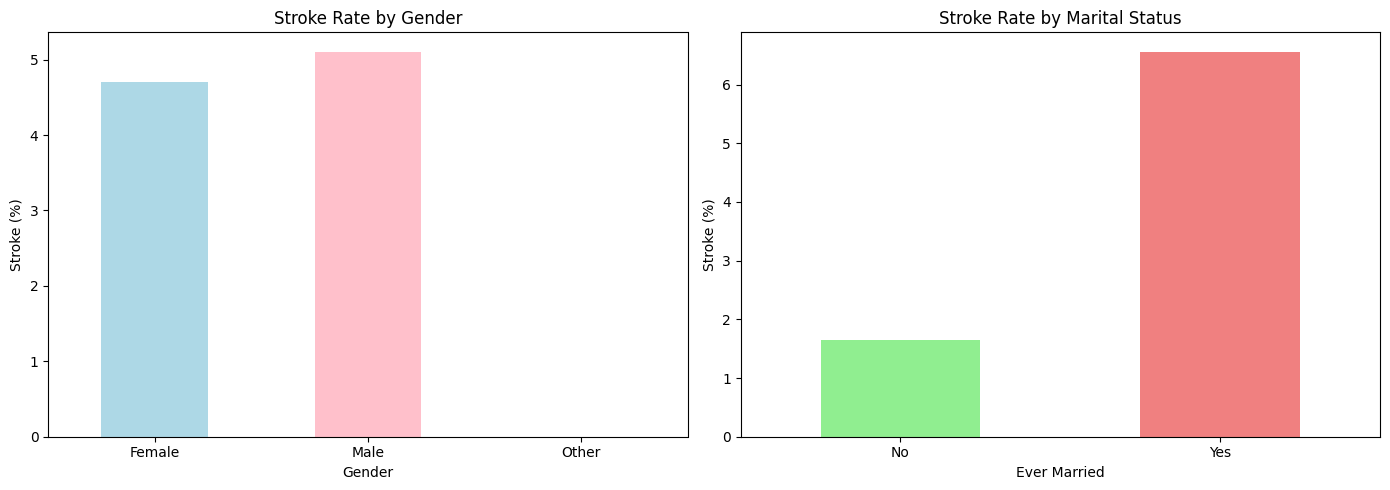

In [ ]:
# Vis 7 Gender and Marital Status Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gender and stroke
gender_stroke = pd.crosstab(df['gender'], df['stroke'], normalize='index') * 100
gender_stroke[1].plot(kind='bar', ax=axes[0], color=['lightblue', 'pink', 'lightgray'])
axes[0].set_title('Stroke Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Stroke (%)')
axes[0].set_xticklabels(['Female', 'Male', 'Other'], rotation=0)

# Marital status and stroke
marital_stroke = pd.crosstab(df['ever_married'], df['stroke'], normalize='index') * 100
marital_stroke[1].plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightcoral'])
axes[1].set_title('Stroke Rate by Marital Status')
axes[1].set_xlabel('Ever Married')
axes[1].set_ylabel('Stroke (%)')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.savefig("C:/Users/Owner/Desktop/FinalProj_StrokeRiskData/outputs/figures/07_stroke_by_Gender_and_marital_status.png",dpi=200)
plt.show()